In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['fixed acidity']=df['fixed acidity'].astype(int)
df['fixed acidity'].dtype

dtype('int32')

In [7]:
df['volatile acidity']=df['volatile acidity'].astype(int)

In [8]:
df['citric acid']=df['citric acid'].astype(int)

In [9]:
df['residual sugar']=df['residual sugar'].astype(int)

In [10]:
df['chlorides']=df['chlorides'].astype(int)

In [11]:
df['free sulfur dioxide']=df['free sulfur dioxide'].astype(int)

In [12]:
df['total sulfur dioxide']=df['total sulfur dioxide'].astype(int)

In [13]:
df['density']=df['density'].astype(int)

In [14]:
df['pH']=df['pH'].astype(int)

In [15]:
df['sulphates']=df['sulphates'].astype(int)

In [16]:
df['alcohol']=df['alcohol'].astype(int)

In [17]:
x=df.drop('quality', axis = 1)
y=df['quality']

In [18]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=24,test_size=0.25, stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
def model_eval(model,x,y):
    y_pred = model.predict(x)

    ac = accuracy_score(y,y_pred)
    print(f"Accuracy Score = {ac}")

    cm = confusion_matrix(y,y_pred)
    print(f"Confusion Matrix = \n{cm}")

    cr = classification_report(y, y_pred)
    print(f"Classification report = \n{cr}")
    
    return "Success"

In [22]:
model_eval(model,x_test,y_test)

Accuracy Score = 0.54
Confusion Matrix = 
[[  0   0   1   0   1   0]
 [  0   1   7   3   2   0]
 [  1   8 105  51   4   1]
 [  2   4  37  91  25   1]
 [  1   0   7  22  19   1]
 [  0   0   1   2   2   0]]
Classification report = 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.08      0.08        13
           5       0.66      0.62      0.64       170
           6       0.54      0.57      0.55       160
           7       0.36      0.38      0.37        50
           8       0.00      0.00      0.00         5

    accuracy                           0.54       400
   macro avg       0.27      0.27      0.27       400
weighted avg       0.55      0.54      0.54       400



'Success'

In [23]:
model_eval(model,x_train,y_train)

Accuracy Score = 0.994161801501251
Confusion Matrix = 
[[  8   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 511   0   0   0]
 [  0   0   3 475   0   0]
 [  0   0   0   4 145   0]
 [  0   0   0   0   0  13]]
Classification report = 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        40
           5       0.99      1.00      1.00       511
           6       0.99      0.99      0.99       478
           7       1.00      0.97      0.99       149
           8       1.00      1.00      1.00        13

    accuracy                           0.99      1199
   macro avg       1.00      0.99      1.00      1199
weighted avg       0.99      0.99      0.99      1199



'Success'

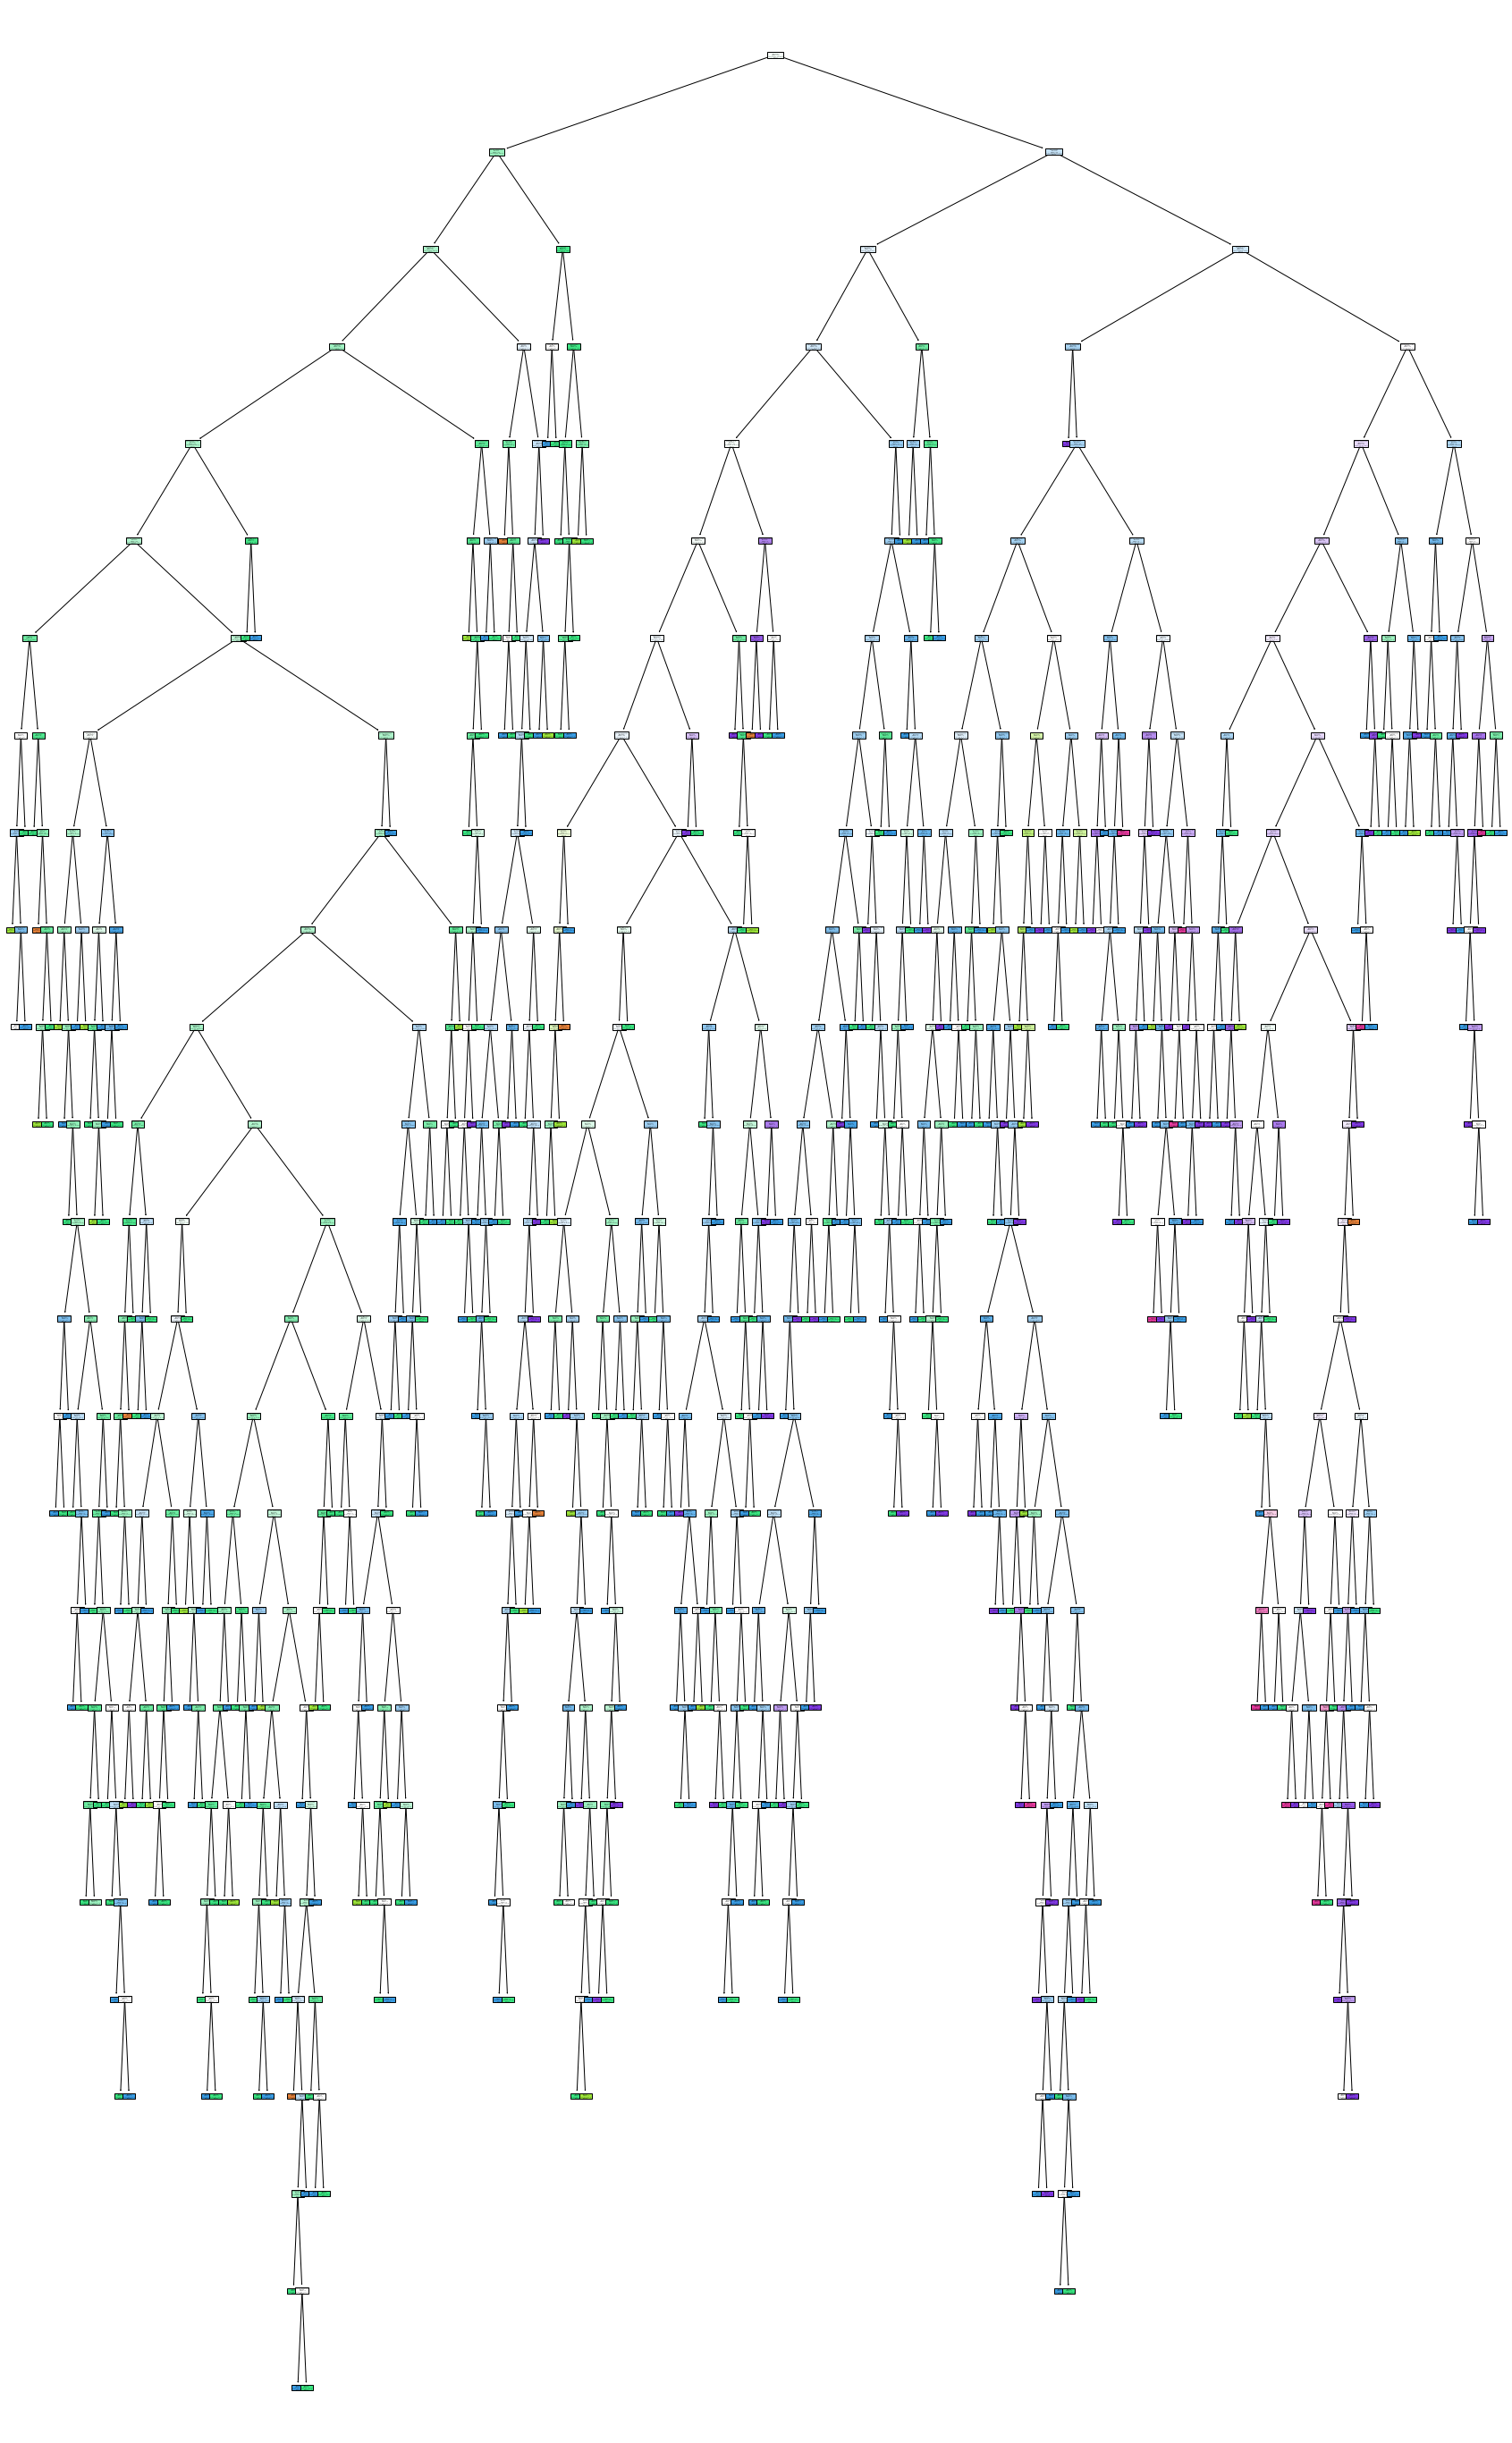

In [24]:
plt.figure(figsize=(30,50))
tree = plot_tree(model,feature_names=x.columns,class_names=['5', '6', '7', '4', '8', '3'],filled=True)
plt.savefig("redwine.png")
# tree

In [26]:
with open('wine_model.pkl','wb') as file:
    pickle.dump(model,file)

In [29]:
model.predict(x)

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [32]:
d1 = {"columns" : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']}
with open("wine_model.json",'w') as file:
    json.dump(d1,file)